###### In this SLR model building task I have used transformation like square with r square value 60%,
exponential with r square value 36%, square transformation with r square value 60%.
Also i have used log transformation in this SLR problem which has r square value 69%.
I have done detailed analysis with log transformation for this SLR.I chose log transformation specifically because 
the delivery_time data is left skewed. With other models i have calculated the r squared value. Comparing all the other models 
i think log transformation model is best fit.

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.api import influence_plot
import statsmodels.formula.api as smf

In [255]:
#Reading csv file 
df = pd.read_csv("delivery_time.csv")
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [256]:
#renaming the column
data = df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, axis =1)
data.tail()

,delivery_time,sorting_time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


# EDA

In [257]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [258]:
data.corr()
# correlation value between X and Y
#This shows high degree of postive correlation

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


In [259]:
#check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [260]:
data.dtypes

delivery_time    float64
sorting_time       int64
dtype: object

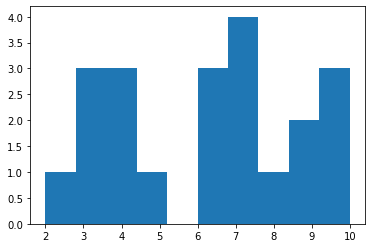

In [261]:
plt.figure(figsize=(6,4))
plt.hist(data.sorting_time)
plt.show()

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

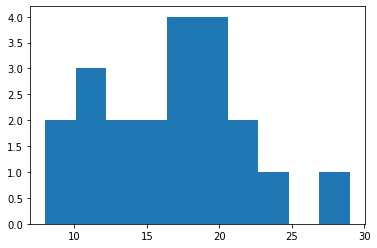

In [262]:
plt.hist(data.delivery_time)

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


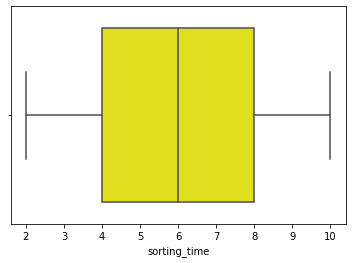

In [263]:
plt.figure(figsize=(6,4))
sns.boxplot(data['sorting_time'],color= 'Yellow')
plt.show()

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


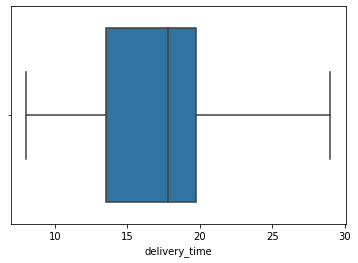

In [264]:
plt.figure(figsize=(6,4))
sns.boxplot(data['delivery_time'])
plt.show()

In [265]:
#boxplot shows that data has no outliers

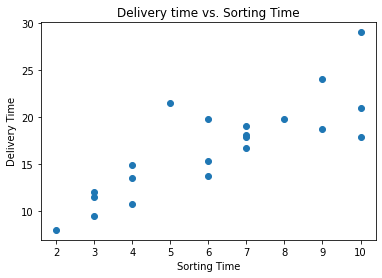

In [266]:
plt.scatter(data['sorting_time'],data['delivery_time'])
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Delivery time vs. Sorting Time')
plt.show()

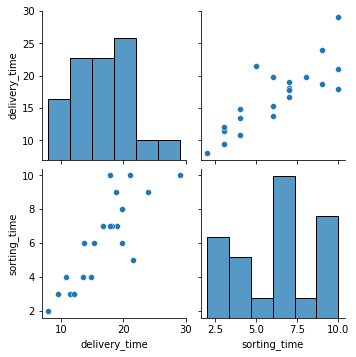

In [267]:
sns.pairplot(data)
plt.show()

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

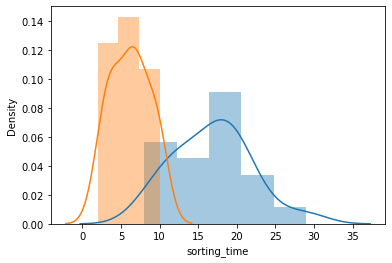

In [268]:
sns.distplot(data['delivery_time'])
sns.distplot(data['sorting_time'])

In [269]:
#From the above EDA and visualisation tools we conclude that the delivery time and sorting time are related.
#the data has no outliers.
#Also the delievry time is positively skewed data.And hecnce we will try with log transformation as it is skewed data

## Using log transformation as it is skewed data

In [270]:
model = smf.ols('delivery_time~np.log(sorting_time)',data=data).fit()

In [271]:
model.params

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64

In [272]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        13:24:23   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
model.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(sorting_time),6.16977,11.917057


In [274]:
pred = model.predict() # Predicted values of sorting time using the model
pred

array([21.98291253, 13.69651659, 17.36330521, 21.03009382, 21.98291253,
       17.36330521, 18.75735354, 11.09488867, 21.98291253, 21.03009382,
       19.96493314, 13.69651659, 18.75735354, 11.09488867, 11.09488867,
       13.69651659, 17.36330521, 18.75735354,  7.42810005, 18.75735354,
       15.71449599])

In [275]:
data['pred_delivery_time']=pred

In [276]:
data['residuals']=model.resid
data

,delivery_time,sorting_time,pred_delivery_time,residuals
0,21.00,10,21.982913,-0.982913
1,13.50,4,13.696517,-0.196517
2,19.75,6,17.363305,2.386695
3,24.00,9,21.030094,2.969906
4,29.00,10,21.982913,7.017087
5,15.35,6,17.363305,-2.013305
6,19.00,7,18.757354,0.242646
7,9.50,3,11.094889,-1.594889
8,17.90,10,21.982913,-4.082913
9,18.75,9,21.030094,-2.280094


In [277]:
data.corr()

,delivery_time,sorting_time,pred_delivery_time,residuals
delivery_time,1.000000,0.825997,8.339325e-01,5.518664e-01
sorting_time,0.825997,1.000000,9.774470e-01,1.970117e-02
pred_delivery_time,0.833933,0.977447,1.000000e+00,1.090293e-15
residuals,0.551866,0.019701,1.090293e-15,1.000000e+00


In [278]:
# Visualization of regresion line over the scatter plot of delivery time and sortingn time

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sorting Time')

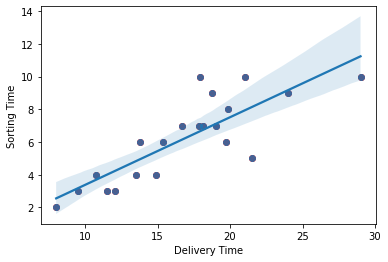

In [279]:
plt.scatter(x=data['delivery_time'],y=data['sorting_time'],color='red')
sns.regplot(data.delivery_time,data.sorting_time)
plt.xlabel('Delivery Time');
plt.ylabel('Sorting Time')


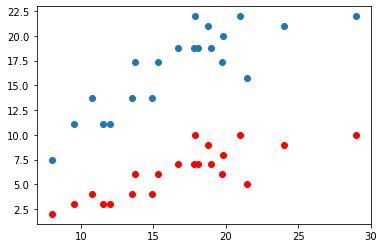

In [280]:
plt.scatter(data.delivery_time,data.pred_delivery_time)
plt.scatter(data.delivery_time,data.sorting_time,color='red')

C:\Users\sneha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

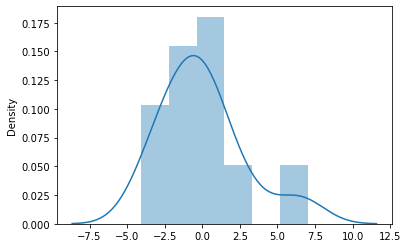

In [281]:
sns.distplot(model.resid)
# the residuals are normally distributed with mean = 0

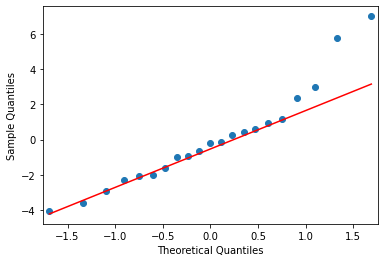

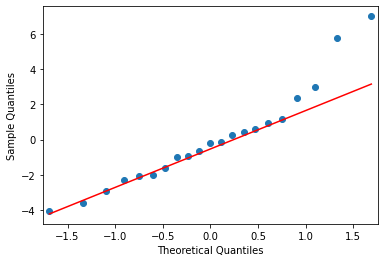

In [282]:
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')

In [283]:
model.pvalues

Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64

In [284]:
model.tvalues

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64

### The accuracy of the model using log transformation is 69%

## Square function

In [285]:
data["deliverytime_Sq"] = data.delivery_time*data.delivery_time

In [286]:
model2 = smf.ols("deliverytime_Sq~sorting_time",data=data).fit()

In [287]:
model2.params

Intercept      -37.440078
sorting_time    55.553783
dtype: float64

In [288]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        deliverytime_Sq   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     28.82
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           3.52e-05
Time:                        13:24:24   Log-Likelihood:                -128.87
No. Observations:                  21   AIC:                             261.7
Df Residuals:                      19   BIC:                             263.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -37.4401     69.013     -0.543      0.594    -181.887     107.007
sorting_time    55.5538     10.348      5.368      0.000      33.894      77.213
==============================================================================
Omnibus:                        9.930   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                7.498
Skew:                           1.194   Prob(JB):                       0.0235
Kurtosis:                       4.694   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The accuracy using square transformation is 60% which is very less.

#  Exponential Transformation

In [289]:
#model3 = smf.ols("np.log(delivery_time)~sorting_time",data=data).fit()

In [298]:
model3 = smf.ols("delivery_time~np.exp(sorting_time)",data=data).fit()

In [300]:
model3.params

Intercept               15.083578
np.exp(sorting_time)     0.000393
dtype: float64

In [301]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.327
Method:                 Least Squares   F-statistic:                     10.74
Date:                Sat, 14 Jan 2023   Prob (F-statistic):            0.00396
Time:                        14:10:00   Log-Likelihood:                -58.691
No. Observations:                  21   AIC:                             121.4
Df Residuals:                      19   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               15.0836      1.047     14.406      0.000      12.892      17.275
np.exp(sorting_time)     0.0004      0.000      3.277      0.004       0.000       0.001
==============================================================================
Omnibus:                        2.426   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.297   Jarque-Bera (JB):                1.151
Skew:                          -0.087   Prob(JB):                        0.562
Kurtosis:                       1.866   Cond. No.                     1.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The accuracy using exponential Transformation is 36%.

# Now lets build model using square  Transformation

In [292]:
data["sortingtime_Sq"] = data.sorting_time*data.sorting_time         

In [293]:
model4 = smf.ols("delivery_time~sortingtime_Sq",data=data).fit()

In [294]:
model4.params

Intercept         11.237205
sortingtime_Sq     0.124870
dtype: float64

In [295]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.64e-06
Time:                        13:24:25   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Now the square  transformation giving same accuracy as first model which is log transformation

In [296]:
#After observing this model we conclude that the accuracy of this model is 69%.

In [297]:
#Observe the r square value of log model iis 0.69 which means our model has 69 accuracy. Also the AIC NIC Values are less.
